In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [84]:
# Provide the file path of your XLSX file
xlsx_file = '/content/drive/MyDrive/Online Retail.xlsx'

# Read the XLSX file into a Pandas DataFrame
data = pd.read_excel(xlsx_file)

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [85]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [86]:
# Preprocessing
# Drop rows with missing values (NaNs)
data.dropna(inplace=True)

In [87]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
data.shape

(406829, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
data.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [55]:
df_first_100 = data[:100]

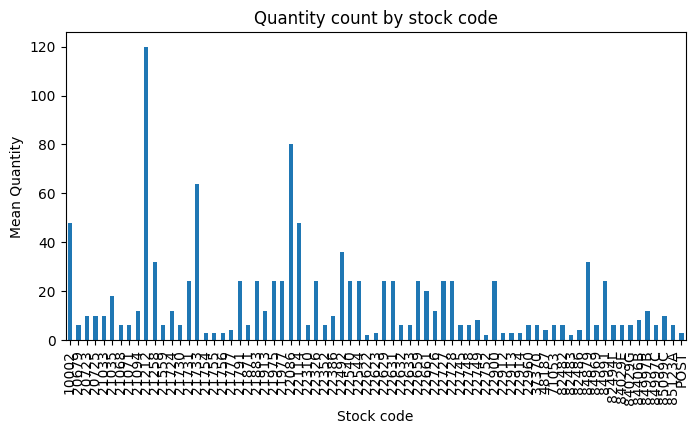

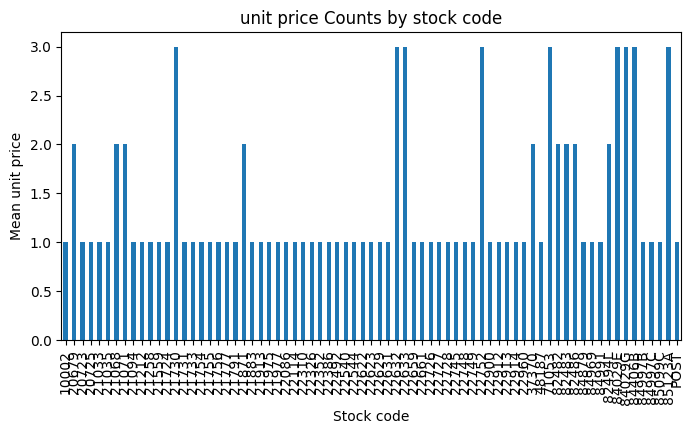

In [78]:
df_first_100.groupby('StockCode')['Quantity'].mean().plot(kind='bar', figsize=(8, 4))
plt.title('Quantity count by stock code')
plt.xlabel('Stock code')
plt.ylabel('Mean Quantity')
plt.show()

# create a pie chart of the count of ratings for each product
df_first_100.groupby('StockCode')['UnitPrice'].count().plot(kind='bar', figsize=(8, 4))
plt.title('unit price Counts by stock code')
plt.xlabel('Stock code')
plt.ylabel('Mean unit price')
plt.show()

Enter the Customer ID: 17841.0
Customer ID: 17841.0
Products Purchased:
Product: HAND WARMER RED RETROSPOT
Quantity: 1
----------------------
Product: CHARLOTTE BAG SUKI DESIGN
Quantity: 1
----------------------
Product: SKULLS AND CROSSBONES WRAP
Quantity: 1
----------------------
Product: POLYESTER FILLER PAD 45x30cm
Quantity: 2
----------------------
Product: POLYESTER FILLER PAD 40x40cm
Quantity: 2
----------------------
Product: 3D CHRISTMAS STAMPS STICKERS 
Quantity: 4
----------------------
Product: VICTORIAN SEWING BOX LARGE
Quantity: 4
----------------------
Product: RED RETROSPOT OVEN GLOVE DOUBLE
Quantity: 2
----------------------
Product: PINK FLOWER FABRIC PONY
Quantity: 6
----------------------
Product: METAL 4 HOOK HANGER FRENCH CHATEAU
Quantity: 30
----------------------
Product: BIRTHDAY PARTY CORDON BARRIER TAPE
Quantity: 10
----------------------
Product: CAMOUFLAGE DESIGN TEDDY
Quantity: 11
----------------------
Product: TV DINNER TRAY AIR HOSTESS 
Quantity: 21
---

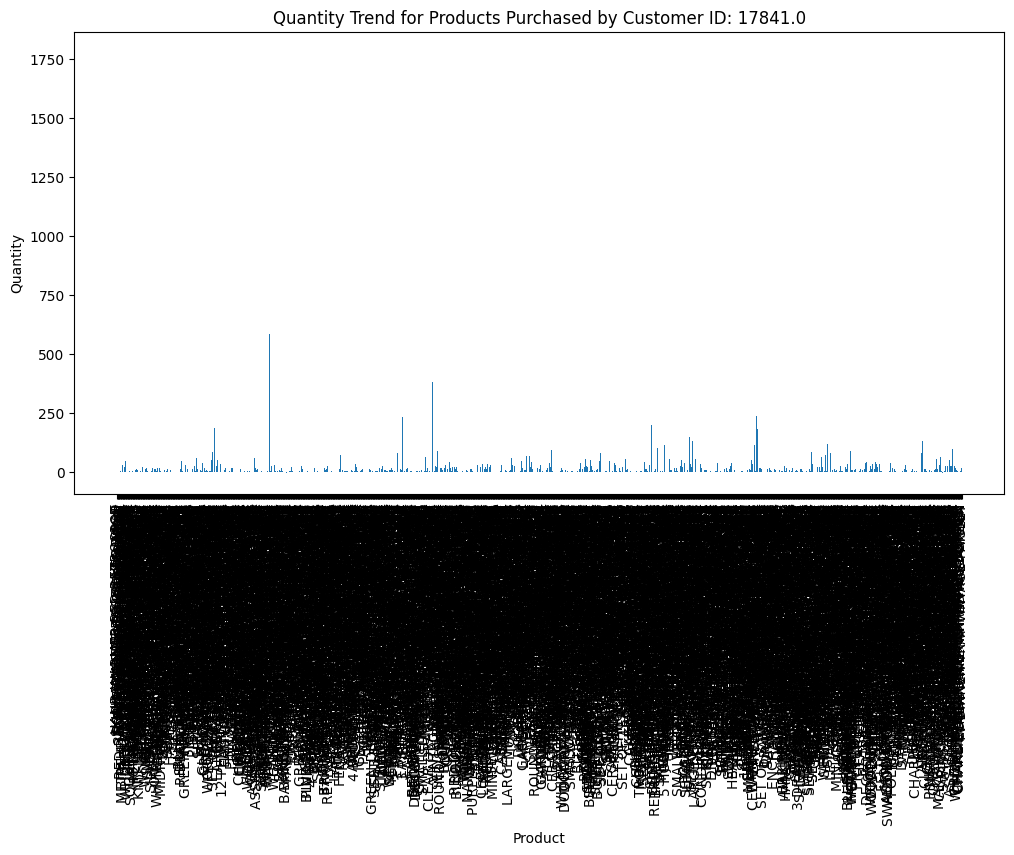

In [67]:


# Enter the customer ID for which you want to retrieve the information
customer_id = input("Enter the Customer ID: ")

# Filter the data for the specified customer ID
customer_data = data[data['CustomerID'] == float(customer_id)]

# Check if the customer exists in the dataset
if len(customer_data) == 0:
    print("Customer ID not found!")
else:
    # Get the unique products and their corresponding quantities
    products = customer_data['Description'].unique()
    quantities = customer_data.groupby('Description')['Quantity'].sum()

    # Print the information for the specified customer
    print("Customer ID:", customer_id)
    print("Products Purchased:")
    for product, quantity in zip(products, quantities):
        print("Product:", product)
        print("Quantity:", quantity)
        print("----------------------")

    # Create a bar plot of the quantity trend for each product
    plt.figure(figsize=(12, 6))
    plt.bar(products, quantities)
    plt.xlabel('Product')
    plt.ylabel('Quantity')
    plt.title(f'Quantity Trend for Products Purchased by Customer ID: {customer_id}')
    plt.xticks(rotation=90)
    plt.show()


Enter the Customer ID: 17841.0


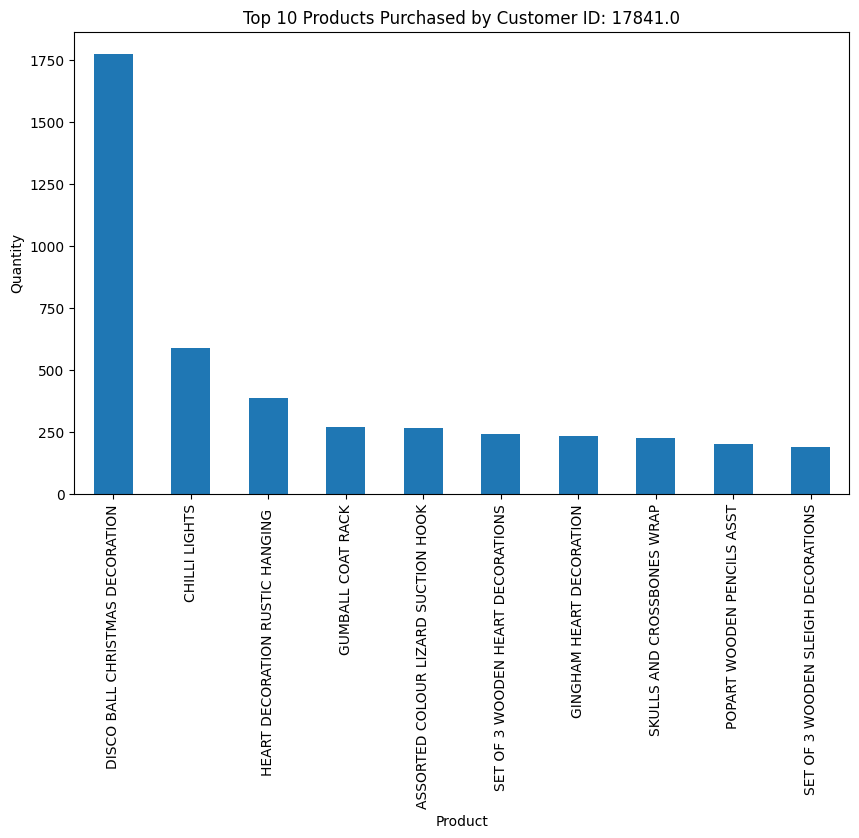

In [68]:


# Enter the customer ID for which you want to retrieve and visualize the information
customer_id = input("Enter the Customer ID: ")

# Filter the data for the specified customer ID
customer_data = data[data['CustomerID'] == float(customer_id)]

# Check if the customer exists in the dataset
if len(customer_data) == 0:
    print("Customer ID not found!")
else:
    # Get the top 10 products and their corresponding quantities
    top_products = customer_data.groupby('Description')['Quantity'].sum().nlargest(10)

    # Create a bar plot for the top 10 products
    plt.figure(figsize=(10, 6))
    top_products.plot(kind='bar')
    plt.xlabel('Product')
    plt.ylabel('Quantity')
    plt.title(f'Top 10 Products Purchased by Customer ID: {customer_id}')
    plt.xticks(rotation=90)
    plt.show()


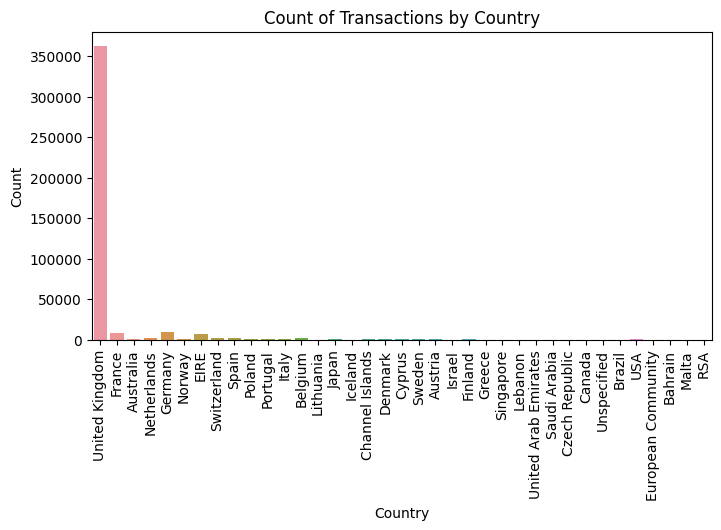

In [79]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Transactions by Country')
plt.xticks(rotation=90)
plt.show()

Enter Customer ID: 17841.0
Customer ID: 17841.0
Total Transactions: 7983
Total Quantity: 22865


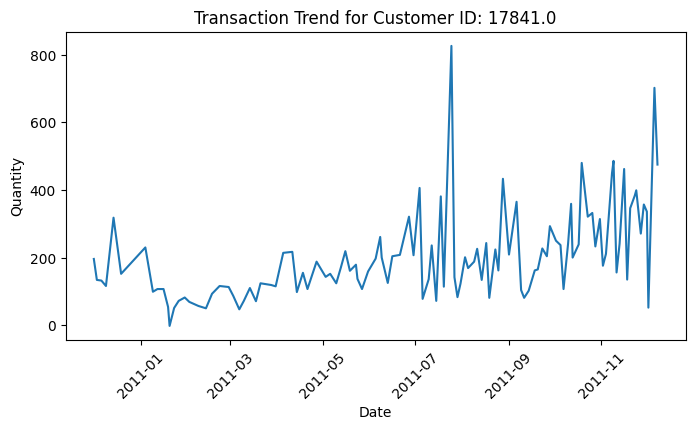

In [81]:


# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Function to print customer information and plot transaction trend
def print_customer_info_and_plot(customer_id):
    # Filter the data for the specified customer ID
    customer_data = data[data['CustomerID'] == customer_id]
    
    if customer_data.empty:
        print("No data available for the specified customer ID.")
        return
    
    # Print customer information
    print("Customer ID:", customer_id)
    print("Total Transactions:", len(customer_data))
    print("Total Quantity:", customer_data['Quantity'].sum())
    
    # Group the data by the date and calculate the sum of quantities
    transaction_trend = customer_data.groupby(customer_data['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
    
    # Create a line plot for the transaction trend
    plt.figure(figsize=(8, 4))
    plt.plot(transaction_trend['InvoiceDate'], transaction_trend['Quantity'])
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.title('Transaction Trend for Customer ID: {}'.format(customer_id))
    plt.xticks(rotation=45)
    plt.show()

# Example usage: Enter a customer ID and print information and plot the transaction trend
customer_id = input("Enter Customer ID: ")
print_customer_info_and_plot(float(customer_id))


Enter Customer ID: 17841.0
Customer ID: 17841.0
Total Transactions: 7983
Total UnitPrice: 20333.18


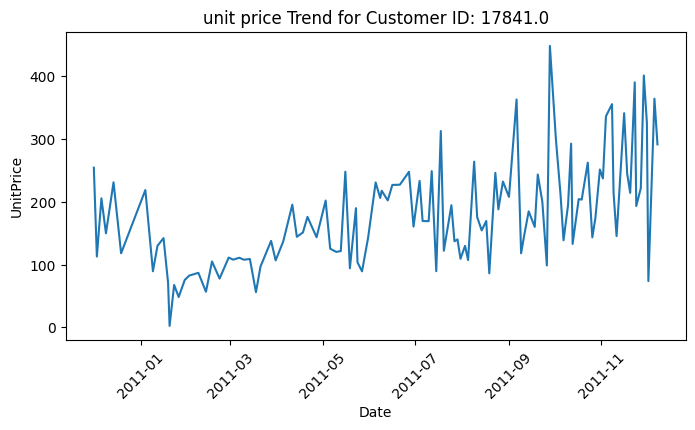

In [83]:


# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Function to print customer information and plot transaction trend
def print_customer_info_and_plot(customer_id):
    # Filter the data for the specified customer ID
    customer_data = data[data['CustomerID'] == customer_id]
    
    if customer_data.empty:
        print("No data available for the specified customer ID.")
        return
    
    # Print customer information
    print("Customer ID:", customer_id)
    print("Total Transactions:", len(customer_data))
    print("Total UnitPrice:", customer_data['UnitPrice'].sum())
    
    # Group the data by the date and calculate the sum of quantities
    transaction_trend = customer_data.groupby(customer_data['InvoiceDate'].dt.date)['UnitPrice'].sum().reset_index()
    
    # Create a line plot for the transaction trend
    plt.figure(figsize=(8, 4))
    plt.plot(transaction_trend['InvoiceDate'], transaction_trend['UnitPrice'])
    plt.xlabel('Date')
    plt.ylabel('UnitPrice')
    plt.title('unit price Trend for Customer ID: {}'.format(customer_id))
    plt.xticks(rotation=45)
    plt.show()

# Example usage: Enter a customer ID and print information and plot the transaction trend
customer_id = input("Enter Customer ID: ")
print_customer_info_and_plot(float(customer_id))



**Recency: **The number of days since the client's most recent transaction.
**Frequency:**  The total number of transactions the consumer has done is known as the frequency.
**Monetary Value:** The sum of the customer's purchases in money.
**Average Unit Price:** The typical unit cost of the goods a consumer purchases.
**Total Quantity:** The total number of goods that the consumer has purchased.
After extracting these features the updated data frame is as follows.


In [9]:
# Preprocessing
# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate the maximum transaction date for each customer
customer_last_transaction = data.groupby('CustomerID')['InvoiceDate'].max()

# Calculate recency (number of days since last transaction)
data['Recency'] = (data['InvoiceDate'].max() - data['CustomerID'].map(customer_last_transaction)).dt.days



In [10]:
customer_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Add the frequency feature to the DataFrame
data['Frequency'] = data['CustomerID'].map(customer_frequency)

# Display the updated DataFrame
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Recency 

In [13]:
# Calculate the monetary value (total purchase amount) for each customer
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
customer_monetary_value = data.groupby('CustomerID')['TotalAmount'].sum()

# Add the monetary value feature to the DataFrame
data['MonetaryValue'] = data['CustomerID'].map(customer_monetary_value)

In [15]:
# Calculate the average unit price for each customer
customer_average_unit_price = data.groupby('CustomerID')['UnitPrice'].mean()

# Add the average unit price feature to the DataFrame
data['AverageUnitPrice'] = data['CustomerID'].map(customer_average_unit_price)

#

In [16]:
# Calculate the total quantity of products purchased for each customer
customer_total_quantity = data.groupby('CustomerID')['Quantity'].sum()

# Add the total quantity feature to the DataFrame
data['TotalQuantity'] = data['CustomerID'].map(customer_total_quantity)

In [18]:
data['Recency'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days

# Set the churn threshold (in days)
churn_threshold = 90

# Assign churn labels
data['Churn'] = data['Recency'] > churn_threshold

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,TotalAmount,MonetaryValue,AverageUnitPrice,TotalQuantity,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,373,35,15.30,5288.63,3.924712,1693,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,373,35,20.34,5288.63,3.924712,1693,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,373,35,22.00,5288.63,3.924712,1693,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,373,35,20.34,5288.63,3.924712,1693,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,373,35,20.34,5288.63,3.924712,1693,1


In [21]:
data.Churn.value_counts()

True     241429
False    165400
Name: Churn, dtype: int64

In [19]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Recency             0
Frequency           0
TotalAmount         0
MonetaryValue       0
AverageUnitPrice    0
TotalQuantity       0
Churn               0
dtype: int64

In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,TotalAmount,MonetaryValue,AverageUnitPrice,TotalQuantity,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,35,15.30,5288.63,3.924712,1693,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,35,20.34,5288.63,3.924712,1693,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,35,22.00,5288.63,3.924712,1693,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,35,20.34,5288.63,3.924712,1693,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,35,20.34,5288.63,3.924712,1693,True


In [22]:
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])
data['Country'] = label_encoder.fit_transform(data['Country'])

In [23]:

classes = data['Churn'].copy()
features = data.drop(['Churn'], axis=1)
features = features.drop(['InvoiceNo'], axis=1)
features = features.drop(['StockCode'], axis=1)
features = features.drop(['Description'], axis=1)
features = features.drop(['CustomerID'], axis=1)
features = features.drop(['InvoiceDate'], axis=1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,classes , test_size=0.3)


In [24]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [25]:
# Logistic Regression model training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Churn prediction
y_pred = logreg.predict(X_test)

In [27]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'macro')
recall = recall_score(y_test, y_pred,average = 'macro')
f1 = f1_score(y_test, y_pred,average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9996149087661513
Precision: 0.9996696395581264
Recall: 0.9995321109511239
F1-score: 0.9996007371457674


In [28]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

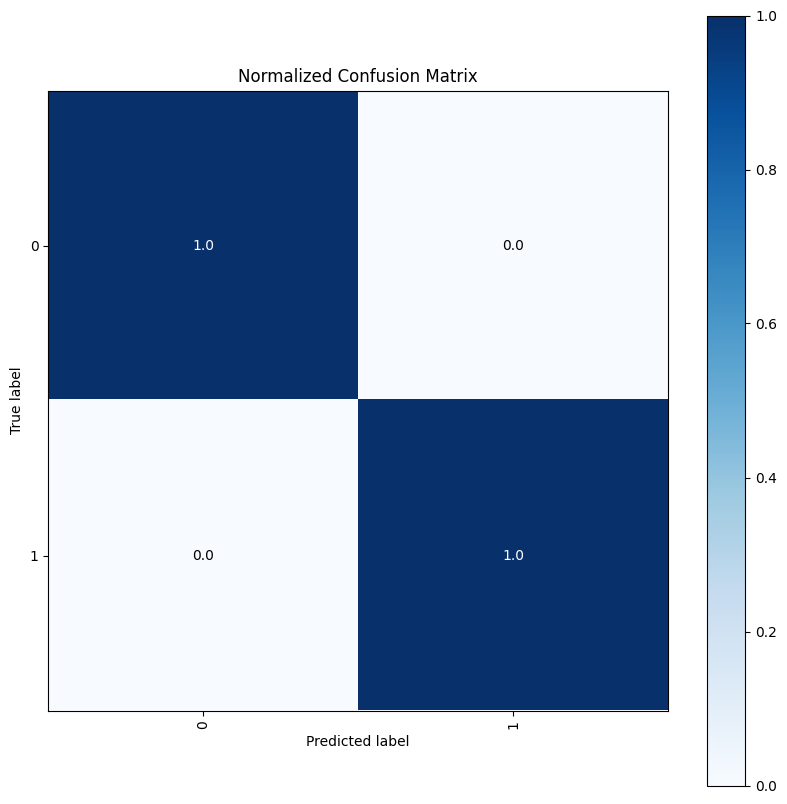

In [30]:

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')




In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

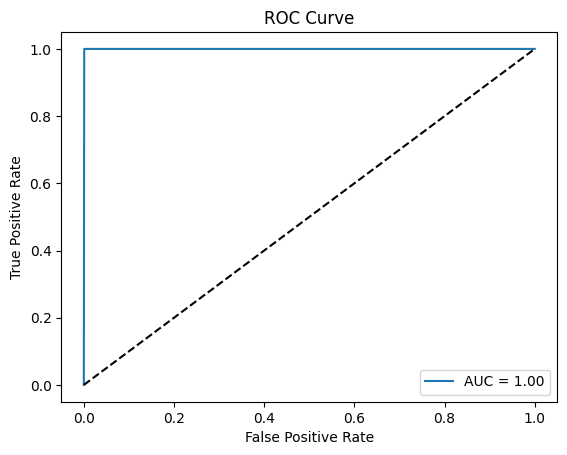

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
data.to_csv('online_retail_updated.csv', index=False)